### 라이브러리 로드

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit

In [43]:
pip install plotly==3.8.1 

SyntaxError: invalid syntax (<ipython-input-43-d1759d7fdf55>, line 1)

In [44]:
pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68729 sha256=a5c41a24a27b5d9f34a2dbfb47421088d1730a066ad3dd469052da909964af2b
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\e1\27\13\3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks
  Attempting uninstall: plotly
    Found existing installation: plotly 3.8.1
    Uninstalling plotly-3.8.1:
      Successfully uninstalled plotly-3.8.1
Note: you may need to restart the kernel to use updated packages.


In [45]:
import plotly.plotly as py 
import cufflinks as cf 
cf.go_offline(connected=True)

In [49]:
fig = dict({
    "data": [{"type": "bar",
              "x": [1, 2, 3],
              "y": [1, 3, 2]}],
    "layout": {"title": {"text": "A Figure Specified By Python Dictionary"}}
})

# To display the figure defined by this dict, use the low-level plotly.io.show function
import plotly.io as pio
import plotly.graph_objects as go

NameError: name 'p' is not defined

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y=time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y=time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y=time['deceased'],
             mode='lines+markers', name='deceased'))

fig.update_layout(title='>', **layout_setting)
fig.show()

TypeError: 'module' object is not subscriptable

### 데이터
##### 여기서는 시간에 따른 누적 데이터 파일인 Time.csv를 사용합니다.
- date - 날짜
- time - 발표시간
- test - 누적 검사 수
- negative - 누적 음성 결과 수
- confirmed - 누적 양성 결과 수 (확진)
- released - 누적 격리 해제 수
- deceased - 누적 사망 수



In [2]:
data_folder = 'Data/dataset/'
data = pd.read_csv('Time.csv', index_col=0)
data.index = pd.to_datetime(data.index) # pd.to_datetime를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성한다.
data.tail()

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-04-16,0,538775,513894,10613,7757,229
2020-04-17,0,546463,521642,10635,7829,230
2020-04-18,0,554834,530631,10653,7937,232
2020-04-19,0,559109,536205,10661,8042,234
2020-04-20,0,563035,540380,10674,8114,236


- timeAge 나이에 따른 확진자
- timeGender 성별에 따른 확진자
- timeProvince 지역별 확진자

In [19]:
timeAge = pd.read_csv('timeAge.csv')
timeGender = pd.read_csv('timeGender.csv')
timeProvince = pd.read_csv('TimeProvince.csv',)

In [23]:
timeAge.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [24]:
timeGender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [25]:
timeProvince.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


### 누적 그래프
- 누적 데이터 파일의 양상을 그래프로 표기합니다. test, negative, confirmed, released, deceased의 전체 양상을 비교하기 위해 숫자에 +1 하고 로그를 취했습니다.

In [22]:
def to_log(data):
    return np.log10(data+1)

plt.figure(figsize=(12, 4)) #그림의 크기,(가로,세로)인치 단위
plt.plot(to_log(data['test']), '-o', label='test', color='k')             # 발표시간
plt.plot(to_log(data['negative']), '-o', label='negative', color='gray')  # 누적 음성 결과 수
plt.plot(to_log(data['confirmed']), '-o', label='confirmed', color='r')   # 누적 양성 결과 수
plt.plot(to_log(data['released']), '-o', label='released', color='b')     # 누적 격리 해제 수 
plt.plot(to_log(data['deceased']), '-o', label='deceased', color='g')     # 누적 사망 수
plt.legend()
plt.ylabel('Log(1+N)')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(data.index[0], data.index[-1])
plt.xticks(rotation=30) # x축 글씨 회전 방향
plt.show()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


### 일별 그래프

In [4]:
data

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-20,16,1,0,1,0,0
2020-01-21,16,1,0,1,0,0
2020-01-22,16,4,3,1,0,0
2020-01-23,16,22,21,1,0,0
2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...
2020-04-16,0,538775,513894,10613,7757,229
2020-04-17,0,546463,521642,10635,7829,230
2020-04-18,0,554834,530631,10653,7937,232


### 그날의 확진자 알려주기

In [5]:
one_day = pd.DataFrame(data=data.iloc[1:].values - data.iloc[:-1].values, columns = data.columns)
one_day.index = data.index[1:]
one_day
# iloc:행 번호를 기준으로 행 데이터 읽기

,time,test,negative,confirmed,released,deceased
date,,,,,,
2020-01-21,0,0,0,0,0,0
2020-01-22,0,3,3,0,0,0
2020-01-23,0,18,18,0,0,0
2020-01-24,0,5,4,1,0,0
2020-01-25,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-04-16,0,4223,4959,22,141,4
2020-04-17,0,7688,7748,22,72,1
2020-04-18,0,8371,8989,18,108,2


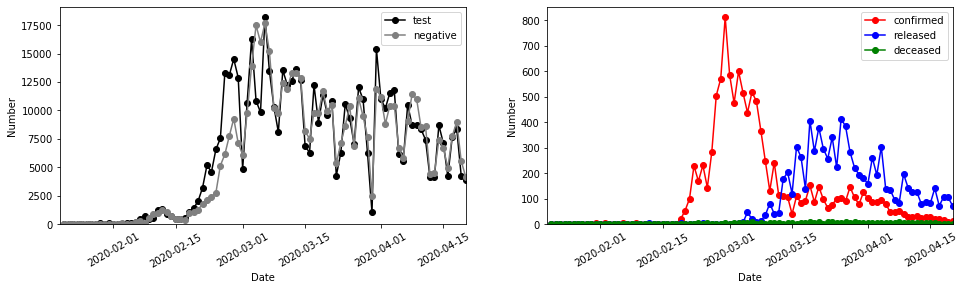

In [6]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(one_day['test'], '-o', label='test', color='k')              # 발표시간
plt.plot(one_day['negative'], '-o', label='negative', color='gray')   # 음성 결과 수
plt.legend()
plt.ylabel('Number')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(data.index[0], data.index[-1])
plt.xticks(rotation=30)

plt.subplot(122)
plt.plot(one_day['confirmed'], '-o', label='confirmed', color='r')    # 양성 결과 수 
plt.plot(one_day['released'], '-o', label='released', color='b')      # 격리 해제 수
plt.plot(one_day['deceased'], '-o', label='deceased', color='g')      # 사망 수
plt.legend()
plt.ylabel('Number')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(data.index[0], data.index[-1])
plt.xticks(rotation=30)

plt.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y=time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y=time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y=time['deceased'],
             mode='lines+markers', name='deceased'))

fig.update_layout(title='>', **layout_setting)
fig.show()

NameError: name 'go' is not defined

### 테스트 당 확진 비율(확진율)
- 확진자 수와 검사 수로 확진율을 계산합니다.
확진율 = 확진자 수 / 검사 수 X 100

In [7]:
one_day['ratio'] = 100 * one_day['confirmed'] / one_day['test']

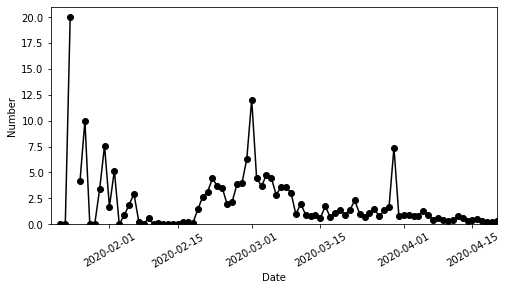

확진율 (%) (확진자 수/검사 수 X 100)
전체	: 2.0393 %
최근 2주	: 1.6817 %


In [8]:
plt.figure(figsize=(8, 4))
plt.plot(one_day['ratio'], '-o', label='test', color='k')
plt.ylabel('Number')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(data.index[0], data.index[-1])
plt.xticks(rotation=30)
plt.show()
print('확진율 (%) (확진자 수/검사 수 X 100)')
print('전체\t: %.4f %%'%(one_day['ratio'].mean()))
print('최근 2주\t: %.4f %%'%(one_day['ratio'].iloc[14:].mean()))

### 순수 확진자 수

In [9]:
data['x'] = data['confirmed'] - data['released'] - data['deceased']

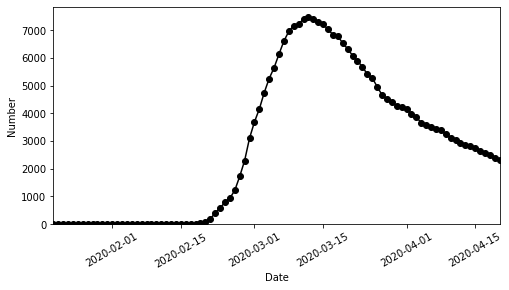

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(data['x'], '-o', label='test', color='k')
plt.ylabel('Number')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(data.index[0], data.index[-1])
plt.xticks(rotation=30)
plt.show()

### 순수 확진자 수 예측

In [11]:
def skew_normal(x, m, a, s, n):
    t = (x-m)/s
    output = 2 / s * scipy.stats.norm.pdf(t) * scipy.stats.norm.cdf(a*t)
    return n * output

In [12]:
xdata = list(range(0, len(data)))
ydata = data['x']
popt, _ = curve_fit(skew_normal, xdata, ydata, bounds=([40, 3, 20, 200000], [45, 5, 25, 300000]))

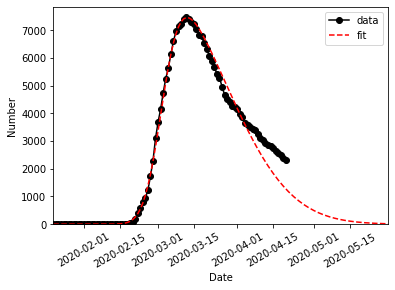

In [13]:
prediction = pd.DataFrame(index=pd.date_range(data.index[0], '2020-5-30'))
prediction.index.name = 'date'
prediction['data'] = np.NaN
prediction['data'].loc[data['x'].index] = data['x']
prediction['idx'] = list(range(0, len(prediction+1)))
prediction['pred'] = prediction['idx'].apply(lambda x: skew_normal(x, popt[0], popt[1], popt[2], popt[3]))

plt.plot(prediction['data'], '-o', label='data', color='k')
plt.plot(prediction['pred'], '--', label='fit', color='r')

plt.legend()
plt.ylabel('Number')
plt.xlabel('Date')
plt.ylim(bottom=0)
plt.xlim(prediction.index[0], prediction.index[-1])
plt.xticks(rotation=30)
plt.show()

### 결론
#### 2020-02-18 부터 확진자 급증
#### 현재 일별 양성 결과, 격리 해재, 사망 수는 일정한 수준으로 유지됨
#### 순수 확진자 수는 감소추세에 있음
#### 순수 확진자 수가 Skew normal distribution을 따른다고 가정할 때 5월 초 종료